# CS210 Spring 2019 - Final Project 



# Analysis of US Homicide Reports 1980-2014


# Group Members:
-Yunus Emre Güney

-Jak Kohen


-Aypar Yangöz





<img src="https://storage.googleapis.com/kaggle-datasets-images/954/1744/0b5ca28982f51bbcaa2cfba7c39fb3cd/dataset-original.jpg" style="height:350px">


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,export_graphviz, DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
lr = linear_model.LinearRegression()

data = pd.read_csv("hdb.csv", low_memory=False)

data.describe()

,Record ID,Year,Incident,Victim Age,Victim Count,Perpetrator Count
count,638454.00000,638454.000000,638454.000000,638454.000000,638454.000000,638454.000000
mean,319227.50000,1995.801102,22.967924,35.033512,0.123334,0.185224
std,184305.93872,9.927693,92.149821,41.628306,0.537733,0.585496
min,1.00000,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,159614.25000,1987.000000,1.000000,22.000000,0.000000,0.000000
50%,319227.50000,1995.000000,2.000000,30.000000,0.000000,0.000000
75%,478840.75000,2004.000000,10.000000,42.000000,0.000000,0.000000
max,638454.00000,2014.000000,999.000000,998.000000,10.000000,10.000000


In [2]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
Record ID                638454 non-null int64
Agency Code              638454 non-null object
Agency Name              638454 non-null object
Agency Type              638454 non-null object
City                     638454 non-null object
State                    638454 non-null object
Year                     638454 non-null int64
Month                    638454 non-null object
Incident                 638454 non-null int64
Crime Type               638454 non-null object
Crime Solved             638454 non-null object
Victim Sex               638454 non-null object
Victim Age               638454 non-null int64
Victim Race              638454 non-null object
Victim Ethnicity         638454 non-null object
Perpetrator Sex          638454 non-null object
Perpetrator Age          638454 non-null object
Perpetrator Race         638454 non-null object
Perpetrator Ethnicity    6384

In [3]:
data.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [4]:
data.corr()

,Record ID,Year,Incident,Victim Age,Victim Count,Perpetrator Count
Record ID,1.000000,0.997286,0.116943,0.004774,0.026973,0.056755
Year,0.997286,1.000000,0.124125,0.005514,0.026765,0.055959
Incident,0.116943,0.124125,1.000000,-0.006918,0.001781,0.001951
Victim Age,0.004774,0.005514,-0.006918,1.000000,-0.008047,-0.017289
Victim Count,0.026973,0.026765,0.001781,-0.008047,1.000000,0.067284
Perpetrator Count,0.056755,0.055959,0.001951,-0.017289,0.067284,1.000000


## Project Description
 
In this project, our goal is to explore homicides  in usa between years 1980-2014 through self-explanatory tables and graphsTo answer/check our main hypothesis we will merge main dataset with small year-gdp dataset.We will use machine learning algorithms to predict victim sex and perpetrator sex in machine learning techniques part.


Also we will  answer following questions:

Which gender participates more in homicides ? 

Which weapons are more popular in homicides ? 

Which race participates more in homicides ? 

Which sex participates more in homicides ? 


Is there a correlation between perperator age and homicide case ? 

Is weapon choice depends on perpertators age ? 

# Main Hypothesis

**Is there a relationship between homicide incidents and growth rate of GDP of US between 1980-2014 ? **

Our aim is to test this since countries economical status clearly has huge impact on moral of citizens thus it might affect homicide incidents (?) 


## Dataset

We obtained our dataset from kaggle as raw csv.

https://www.kaggle.com/jyzaguirre/us-homicide-reports

Our data set has 24 columns(attributes)  includes the age, race, sex, ethnicity of victims and perpetrators, in addition to the relationship between the victim and perpetrator and weapon used.Data set has 638454 entries.

# Mini Dataset
We are also using a second data set which is GDP rates of USA from 1980-2014 to test our main hypothesis. 
We created this dataset by ourselves by extracting required data from other big datasets since its  just 2 columns(year and gdp rate)
We use this dataset by merging it  with our main dataset so we can run our hypothesis tests on merged dataset. 
http://bit.do/eQSfL





In [5]:
cols = data.columns
cols = cols.map(lambda x: x.replace(' ', '_'))
data.columns = cols

In [6]:
#clear the unnecessary data here
#if this throws error rerun all cells.
data = data.drop(['Agency_Code', 'Victim_Ethnicity', 'Agency_Name','Agency_Type', 'Perpetrator_Ethnicity', 'Victim_Count', 'Perpetrator_Count'], axis=1)
data = data[data.Perpetrator_Age != "0"]
data = data[data.Perpetrator_Age != ""]
data = data[data.Perpetrator_Age != " "]
data = data[data.Victim_Sex != "Unknown"]
data = data[data.Victim_Race != "Unknown"]
data = data[data.Perpetrator_Sex != "Unknown"]
data = data[data.Perpetrator_Race != "Unknown"]
data = data[data.Relationship != "Unknown"]
data = data[data.Weapon != "Unknown"]
data

,Record_ID,City,State,Year,Month,Incident,Crime_Type,Crime_Solved,Victim_Sex,Victim_Age,Victim_Race,Perpetrator_Sex,Perpetrator_Age,Perpetrator_Race,Relationship,Weapon,Record_Source
0,1,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Male,15,Native American/Alaska Native,Acquaintance,Blunt Object,FBI
1,2,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Male,42,White,Acquaintance,Strangulation,FBI
3,4,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Male,42,White,Acquaintance,Strangulation,FBI
5,6,Anchorage,Alaska,1980,May,1,Murder or Manslaughter,Yes,Male,30,White,Male,36,White,Acquaintance,Rifle,FBI
6,7,Anchorage,Alaska,1980,May,2,Murder or Manslaughter,Yes,Female,42,Native American/Alaska Native,Male,27,Black,Wife,Knife,FBI
7,8,Anchorage,Alaska,1980,June,1,Murder or Manslaughter,Yes,Female,99,White,Male,35,White,Wife,Knife,FBI
11,12,Anchorage,Alaska,1980,July,2,Murder or Manslaughter,Yes,Male,20,White,Male,49,White,Stranger,Shotgun,FBI
12,13,Anchorage,Alaska,1980,July,3,Murder or Manslaughter,Yes,Female,36,Black,Male,39,Black,Girlfriend,Blunt Object,FBI
15,16,Anchorage,Alaska,1980,August,3,Murder or Manslaughter,Yes,Male,31,Black,Female,29,Black,Ex-Husband,Handgun,FBI
17,18,Juneau,Alaska,1980,November,1,Murder or Manslaughter,Yes,Male,33,Native American/Alaska Native,Male,23,Native American/Alaska Native,Brother,Blunt Object,FBI


In [7]:
data.groupby('Weapon').describe()


Record_ID                                                   \
                  count           mean            std     min        25%   
Weapon                                                                     
Blunt Object    40757.0  311199.300905  184380.883076     1.0  146660.00   
Drowning          908.0  282801.124449  182718.080161    45.0  125348.50   
Drugs            1159.0  423884.824849  170545.150064  3796.0  321682.00   
Explosives        332.0  300250.792169  127382.084314  4515.0  231893.50   
Fall              146.0  272387.965753  185187.259426  5200.0  102415.50   
Fire             3347.0  282784.446669  178903.418584   716.0  134592.50   
Firearm         12078.0  407479.487581  190845.695688   263.0  252742.75   
Gun               746.0  394714.222520  183109.039069  6679.0  265264.00   
Handgun        159003.0  296403.143733  180706.555697    16.0  140331.50   
Knife           61223.0  281999.439867  185966.803584     7.0  118408.50   
Poison            322.0  309633.866460  193839.076248  8269.0  154740.25   
Rifle           16545.0  255501.214445  179360.557291     6.0  101731.00   
Shotgun         22100.0  245475.636109  174305.893635    12.0   98114.50   
Strangulation    3785.0  280740.429326  176507.879218     2.0  132825.00   
Suffocation      2587.0  348934.636645  184748.450373   521.0  181860.00   

                                                  Year               ...  \
                    50%        75%       max     count         mean  ...   
Weapon                                                               ...   
Blunt Object   311509.0  468136.00  638454.0   40757.0  1995.344677  ...   
Drowning       249773.5  431073.00  637480.0     908.0  1993.855727  ...   
Drugs          474541.0  564156.50  638413.0    1159.0  2001.495255  ...   
Explosives     330067.5  330150.25  636058.0     332.0  1994.102410  ...   
Fall           254721.0  405639.25  635264.0     146.0  1993.171233  ...   
Fire           253921.0  428894.00  638394.0    3347.0  1993.802211  ...   
Firearm        466022.5  571489.25  638449.0   12078.0  2000.706160  ...   
Gun            442872.0  544249.00  638014.0     746.0  1999.845845  ...   
Handgun        286730.0  445377.00  638451.0  159003.0  1994.538763  ...   
Knife          250027.0  442678.50  638453.0   61223.0  1993.833298  ...   
Poison         309991.0  474391.00  638064.0     322.0  1995.363354  ...   
Rifle          217453.0  390942.00  638334.0   16545.0  1992.382774  ...   
Shotgun        208552.0  377118.75  638443.0   22100.0  1991.830090  ...   
Strangulation  255293.0  420067.00  637494.0    3785.0  1993.729194  ...   
Suffocation    375036.0  509764.00  638452.0    2587.0  1997.381523  ...   

              Incident        Victim_Age                                    \
                   75%    max      count       mean        std  min    25%   
Weapon                                                                       
Blunt Object       4.0  999.0    40757.0  35.018721  34.949302  0.0  17.00   
Drowning           3.0  116.0      908.0  13.798458  38.158321  0.0   0.00   
Drugs              2.0  806.0     1159.0  32.787748  46.214598  0.0  17.00   
Explosives        14.0  121.0      332.0  36.210843  21.093178  0.0  22.00   
Fall               3.0  131.0      146.0  37.705479  83.182572  0.0  17.00   
Fire               5.0  946.0     3347.0  32.885868  25.273237  0.0   9.00   
Firearm            6.0  986.0    12078.0  33.636281  29.355159  0.0  22.00   
Gun                2.0  140.0      746.0  33.916890  38.841251  0.0  21.00   
Handgun            7.0  999.0   159003.0  32.546424  16.562591  0.0  22.00   
Knife              5.0  999.0    61223.0  36.170459  20.213207  0.0  24.00   
Poison             2.0  778.0      322.0  36.810559  28.656818  0.0   9.25   
Rifle              2.0  970.0    16545.0  34.390511  19.412951  0.0  23.00   
Shotgun            3.0  994.0    22100.0  34.871357  18.290425  0.0  23.00   
Strangulation      4.0  183.

In [8]:
data.groupby('Perpetrator_Age').describe()


Record_ID                                                     \
                    count           mean            std       min        25%   
Perpetrator_Age                                                                
1                     4.0  393803.250000   83150.023341  273689.0  370206.50   
10                  118.0  284634.177966  182522.589913   13355.0  127922.50   
11                  190.0  259164.457895  168255.507632    6084.0  124640.50   
12                  415.0  280780.544578  170302.612210    4097.0  136394.00   
13                  934.0  275271.654176  161855.005503     532.0  146426.50   
14                 2034.0  280364.816618  161441.348755     250.0  155594.25   
15                 4146.0  285383.361795  159320.013200       1.0  167994.00   
16                 6946.0  291279.141664  162424.438863     151.0  167602.25   
17                10264.0  296731.876461  165474.054469      87.0  170673.50   
18                13497.0  309601.044232  170784.489884      99.0  176630.00   
19                14572.0  307823.550714  174793.874316      74.0  165674.25   
2                     6.0  260634.333333  122583.503111   93777.0  170053.75   
20                15149.0  309113.797016  177638.214515     110.0  159232.00   
21                13889.0  304367.960976  183185.798950      41.0  143427.00   
22                13641.0  296991.383989  184444.947265      58.0  133203.00   
23                12990.0  291080.814858  184968.066983      18.0  126026.75   
24                12294.0  286699.810395  185978.142458      66.0  119047.00   
25                12929.0  285259.652719  185039.888117      31.0  121350.00   
26                11241.0  282956.892892  187199.506468      45.0  117502.00   
27                10838.0  279380.890847  184615.136203       7.0  116233.50   
28                10324.0  280979.013851  187025.806101      28.0  117197.50   
29                 9685.0  277482.021890  185329.592710      16.0  116631.00   
3                    22.0  292420.590909  218545.126887   16783.0  110937.75   
30                10488.0  278413.203757  184188.585668      65.0  119128.00   
31                 8626.0  280300.797821  186324.406354     222.0  117216.25   
32                 8497.0  280076.011298  186594.854819      53.0  116894.00   
33                 7852.0  278425.630285  185407.610432      19.0  116119.50   
34                 7454.0  284971.947142  184227.258730     166.0  124340.25   
35                 7763.0  286136.995363  185069.979848       8.0  123860.50   
36                 6711.0  286828.710624  184188.231362       6.0  124513.50   
...                   ...            ...            ...       ...        ...   
72                  447.0  281960.501119  186317.289336     780.0  113101.50   
73                  419.0  278315.305489  188725.965847     124.0  118749.50   
74                  333.0  295478.210210  191705.889844    6401.0  117878.00   
75                  333.0  291975.363363  196848.770707     548.0  101720.00   
76                  322.0  325252.704969  191674.358202     397.0  155305.00   
77                  288.0  299206.444444  181827.095199     334.0  147478.75   
78                  250.0  323141.140000  181773.918424    3476.0  159835.25   
79                  226.0  312632.508850  178471.152575    1802.0  151351.50   
8                    58.0  289778.879310  164993.757236    6987.0  156272.75   
80                  228.0  335634.289474  193352.262557    3948.0  155543.75   
81                  202.0  352743.059406  196395.261067    4231.0  164348.50   
82                  174.0  314246.454023  174851.289719    5768.0  167184.50   
83                  151.0  323109.211921  184207.726264    6600.0  158006.50   
84                  127.0  362918.551181  186248.261291    7096.0  205260.00   
85                  128.0  341715.421875  186486.403801    7424.0  181257.50   
86                   93.0  399983.150538  190732.350834    8742.0  240186.00   
87              

In [9]:
data.groupby('Crime_Solved').describe()


Record_ID                                                     \
                 count           mean            std       min        25%   
Crime_Solved                                                                
No                 2.0  383655.500000   11564.731406  375478.0  379566.75   
Yes           325036.0  294871.621897  184406.360998       1.0  132698.75   

                                                 Year               ...  \
                   50%        75%       max     count         mean  ...   
Crime_Solved                                                        ...   
No            383655.5  387744.25  391833.0       2.0  1998.500000  ...   
Yes           280127.5  450305.75  638454.0  325036.0  1994.482623  ...   

             Incident        Victim_Age                                     \
                  75%    max      count       mean        std   min    25%   
Crime_Solved                                                                 
No                1.0    1.0        2.0  47.500000  30.405592  26.0  36.75   
Yes               5.0  999.0   325036.0  33.802154  22.031347   0.0  22.00   

                                  
               50%    75%    max  
Crime_Solved                      
No            47.5  58.25   69.0  
Yes           30.0  42.00  998.0  

[2 rows x 32 columns]

In [10]:
data.groupby('Victim_Sex').describe()


Record_ID                                                         \
               count           mean            std  min       25%       50%   
Victim_Sex                                                                    
Female       87447.0  307717.536634  185159.409153  7.0  143268.0  302365.0   
Male        237591.0  290144.342084  183902.464962  1.0  128912.5  272438.0   

                                    Year               ... Incident         \
                 75%       max     count         mean  ...      75%    max   
Victim_Sex                                             ...                   
Female      465394.0  638454.0   87447.0  1995.165357  ...      4.0  999.0   
Male        445128.5  638453.0  237591.0  1994.231372  ...      6.0  999.0   

           Victim_Age                                                      
                count       mean        std  min   25%   50%   75%    max  
Victim_Sex                                                                 
Female        87447.0  35.830926  25.646064  0.0  23.0  33.0  46.0  998.0  
Male         237591.0  33.055566  20.490993  0.0  22.0  30.0  41.0  998.0  

[2 rows x 32 columns]

In [11]:
data.groupby('Victim_Race').describe()


Record_ID                                      \
                                  count           mean            std   min   
Victim_Race                                                                   
Asian/Pacific Islander           5242.0  343562.567341  175624.145958  32.0   
Black                          140057.0  284742.889709  180958.120953  13.0   
Native American/Alaska Native    2999.0  314454.720240  185521.146399   1.0   
White                          176740.0  301122.667297  186799.169087   2.0   

                                                                         \
                                     25%       50%        75%       max   
Victim_Race                                                               
Asian/Pacific Islander         201733.25  352832.0  489248.00  638452.0   
Black                          130023.00  264720.0  430775.00  638448.0   
Native American/Alaska Native  147827.50  313971.0  476204.00  638449.0   
White                          133904.50  290593.0  463293.25  638454.0   

                                   Year               ... Incident         \
                                  count         mean  ...      75%    max   
Victim_Race                                           ...                   
Asian/Pacific Islander           5242.0  1997.117894  ...      4.0  938.0   
Black                          140057.0  1993.921596  ...      9.0  999.0   
Native American/Alaska Native    2999.0  1995.571857  ...      2.0  904.0   
White                          176740.0  1994.830610  ...      3.0  999.0   

                              Victim_Age                                   \
                                   count       mean        std  min   25%   
Victim_Race                                                                 
Asian/Pacific Islander            5242.0  33.574018  22.193894  0.0  22.0   
Black                           140057.0  31.343117  19.161195  0.0  21.0   
Native American/Alaska Native     2999.0  31.830944  23.434957  0.0  22.0   
White                           176740.0  35.791179  23.853072  0.0  23.0   

                                                  
                                50%   75%    max  
Victim_Race                                       
Asian/Pacific Islander         31.0  44.0  998.0  
Black                          28.0  38.0  998.0  
Native American/Alaska Native  30.0  40.0  998.0  
White                          32.0  46.0  998.0  

[4 rows x 32 columns]

In [12]:
data.groupby('Perpetrator_Sex').describe()


Record_ID                                                \
                    count           mean            std   min       25%   
Perpetrator_Sex                                                           
Female            39599.0  269057.041314  184941.220371  16.0  107264.5   
Male             285439.0  298453.505047  184046.076083   1.0  137168.0   

                                                   Year               ...  \
                      50%       75%       max     count         mean  ...   
Perpetrator_Sex                                                       ...   
Female           236171.0  419687.5  638454.0   39599.0  1993.131392  ...   
Male             286355.0  454936.5  638453.0  285439.0  1994.670108  ...   

                Incident        Victim_Age                                   \
                     75%    max      count       mean        std  min   25%   
Perpetrator_Sex                                                               
Female               5.0  998.0    39599.0  34.499179  27.189789  0.0  23.0   
Male                 5.0  999.0   285439.0  33.705552  21.215158  0.0  22.0   

                                    
                  50%   75%    max  
Perpetrator_Sex                     
Female           33.0  46.0  998.0  
Male             30.0  42.0  998.0  

[2 rows x 32 columns]

In [13]:
data.groupby('Perpetrator_Race').describe()


Record_ID                                      \
                                  count           mean            std   min   
Perpetrator_Race                                                              
Asian/Pacific Islander           4648.0  338101.050129  176311.831258  32.0   
Black                          150456.0  286245.119796  180648.236521   7.0   
Native American/Alaska Native    3001.0  311755.834389  185015.066157   1.0   
White                          166933.0  301140.524174  187499.922651   2.0   

                                                                         \
                                     25%       50%        75%       max   
Perpetrator_Race                                                          
Asian/Pacific Islander         193986.00  343157.5  484540.75  638452.0   
Black                          131303.75  267591.5  432421.25  638449.0   
Native American/Alaska Native  141798.00  314689.0  465715.00  638444.0   
White                          132912.00  290532.0  463920.00  638454.0   

                                   Year               ... Incident         \
                                  count         mean  ...      75%    max   
Perpetrator_Race                                      ...                   
Asian/Pacific Islander           4648.0  1996.823150  ...      4.0  938.0   
Black                          150456.0  1993.996783  ...      9.0  999.0   
Native American/Alaska Native    3001.0  1995.405198  ...      2.0  904.0   
White                          166933.0  1994.838804  ...      3.0  999.0   

                              Victim_Age                                   \
                                   count       mean        std  min   25%   
Perpetrator_Race                                                            
Asian/Pacific Islander            4648.0  31.574871  17.249832  0.0  20.0   
Black                           150456.0  32.275356  19.741700  0.0  22.0   
Native American/Alaska Native     3001.0  32.988670  17.206255  0.0  22.0   
White                           166933.0  35.255054  23.997184  0.0  23.0   

                                                  
                                50%   75%    max  
Perpetrator_Race                                  
Asian/Pacific Islander         29.0  41.0   99.0  
Black                          29.0  40.0  998.0  
Native American/Alaska Native  31.0  43.0   99.0  
White                          32.0  45.0  998.0  

[4 rows x 32 columns]

In [14]:
data.groupby('Relationship').describe()


Record_ID                                        \
                         count           mean            std     min   
Relationship                                                           
Acquaintance          116416.0  279414.489108  178796.509377     1.0   
Boyfriend               6947.0  295365.317691  186582.108505   214.0   
Boyfriend/Girlfriend    1204.0  278964.495847  190725.947320   777.0   
Brother                 5291.0  275567.757513  187240.813731    18.0   
Common-Law Husband      1879.0  195230.105907  155857.419678   251.0   
Common-Law Wife         2303.0  262879.321320  177372.572409   302.0   
Daughter                6138.0  328012.523135  184376.657953   567.0   
Employee                 340.0  285705.597059  183916.693051  6066.0   
Employer                 472.0  307054.114407  178643.561894  1714.0   
Ex-Husband               596.0  222736.578859  182920.047170    16.0   
Ex-Wife                 1875.0  300038.428267  188286.439003   121.0   
Family                  8802.0  323785.730970  189114.224075    43.0   
Father                  4106.0  313502.017535  193403.176527    59.0   
Friend                 20477.0  279090.437808  180083.015729    41.0   
Girlfriend             15272.0  345366.352672  182785.577282    13.0   
Husband                 8413.0  226460.687032  176569.240469    28.0   
In-Law                  3494.0  248503.132513  185701.268058    65.0   
Mother                  3861.0  336221.412069  191311.152909   218.0   
Neighbor                6002.0  271469.964512  186903.842313    48.0   
Sister                  1215.0  298185.439506  189034.724382    32.0   
Son                     8303.0  321478.207274  187228.198685    76.0   
Stepdaughter             693.0  328279.339105  180538.129374  3408.0   
Stepfather              1309.0  282610.374332  191820.497231   363.0   
Stepmother               199.0  278044.115578  184276.746959   528.0   
Stepson                 1105.0  305293.674208  189718.549885   527.0   
Stranger               76431.0  313409.871584  184590.021726    12.0   
Wife                   21895.0  308020.720484  188893.519545     7.0   

                                                                    Year  \
                            25%       50%        75%       max     count   
Relationship                                                               
Acquaintance          124808.50  260439.0  422137.25  638451.0  116416.0   
Boyfriend             131959.00  275893.0  454432.50  638349.0    6947.0   
Boyfriend/Girlfriend  113033.50  240894.5  440146.25  637806.0    1204.0   
Brother               110050.00  240446.0  432109.50  638271.0    5291.0   
Common-Law Husband     69917.50  157356.0  292554.50  637775.0    1879.0   
Common-Law Wife       109965.50  245283.0  401374.50  637782.0    2303.0   
Daughter              162996.25  339540.0  484892.75  638454.0    6138.0   
Employee              117486.75  250289.0  453276.50  638052.0     340.0   
Employer              149191.75  298776.5  455033.75  636330.0     472.0   
Ex-Husband             72413.75  156333.5  364569.00  636713.0     596.0   
Ex-Wife               131101.00  289323.0  459232.50  636839.0    1875.0   
Family                153994.25  325145.0  492552.75  638432.0    8802.0   
Father                136265.00  311090.0  482263.50  638371.0    4106.0   
Friend                128138.00  246124.0  420358.00  638449.0   20477.0   
Girlfriend            185822.25  362637.5  505560.00  638448.0   15272.0   
Husband                79692.00  176203.0  353011.00  638425.0    8413.0   
In-Law                 87811.50  197626.5  399074.75  638216.0    3494.0   
Mother                164065.00  346810.0  508577.00  638447.0    3861.0   
Neighbor              108383.25  239264.0  425989.50  638209.0    6002.0   
Sister                133034.50  279499.0  457332.00  638385.0    1215.0   
Son                   151960.00  325779.0  484068.00  638415.0    8303.0   
Stepdaughter          167790.00  341

In [15]:
data['Victim_Age']


0          14
1          43
3          43
5          30
6          42
7          99
11         20
12         36
15         31
17         33
18         27
19         33
25         36
27         31
28         27
30         27
31          8
37         23
39         45
40         21
41         26
42         25
43         40
44         26
45         23
46         26
47         58
48         43
49         26
50         17
         ... 
638411     48
638412     66
638414      1
638416     39
638419    998
638421     77
638423     41
638424     42
638425     34
638426     39
638427     39
638428     24
638429     32
638430     36
638431     59
638432     32
638439     63
638440     21
638441     48
638442     51
638443     19
638444     48
638445     22
638446     76
638447     21
638448     29
638450     62
638451      0
638452     55
638453      0
Name: Victim_Age, Length: 325038, dtype: int64

# Data Exploration

Below we are starting to dive deep into our dataset and look for answers to our questions with graphs.

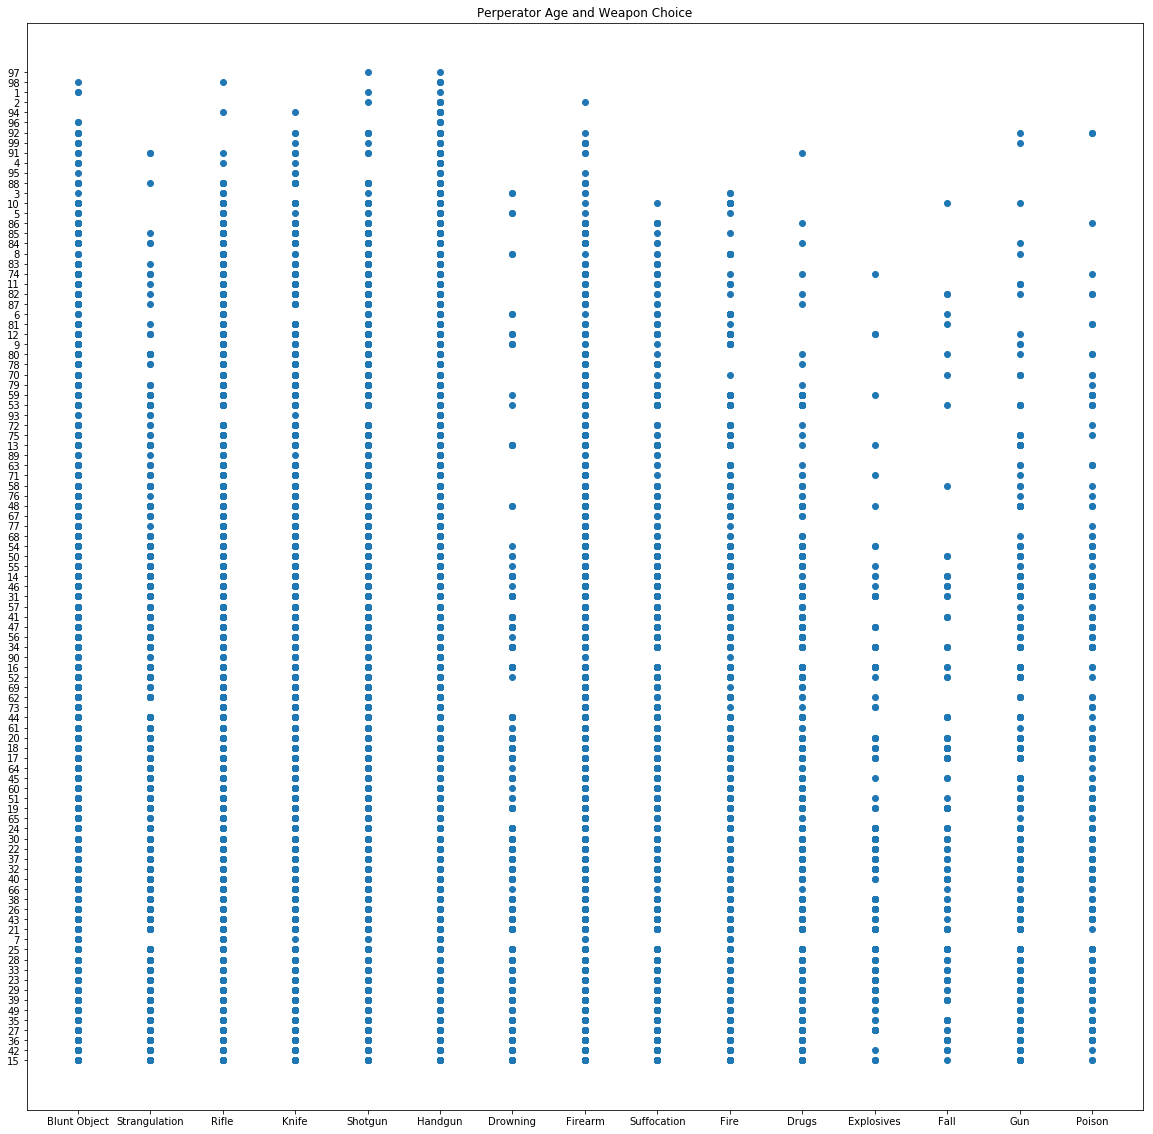

In [16]:
plt.figure(figsize=(20,20))
plt.title('Perperator Age and Weapon Choice')

plt.scatter(data["Weapon"],data["Perpetrator_Age"])
plt.show()


Text(0, 0.5, '')

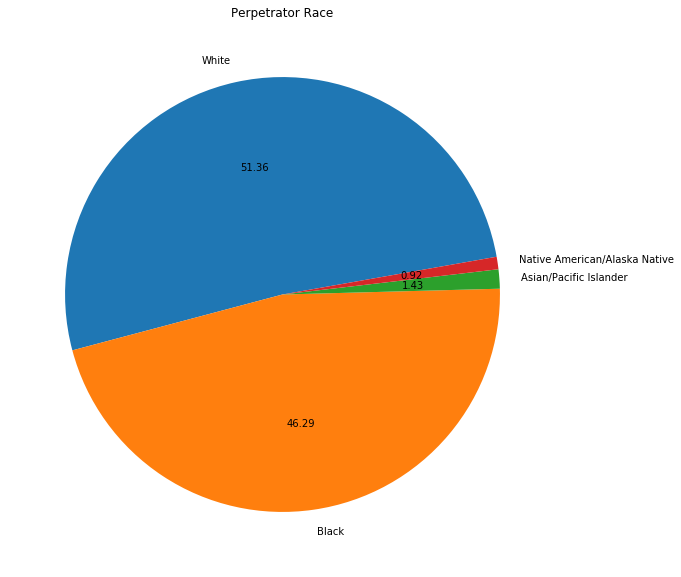

In [17]:
race = pd.DataFrame(data, columns = ['Perpetrator_Race']) 
count_race = race.stack().value_counts()
ax = count_race.plot(kind = 'pie',
                              title = 'Perpetrator Race',
                                                     figsize=(10,10),

                              startangle = 10,
                              autopct='%.2f',
                             )
ax.set_ylabel('')

AxesSubplot(0.125,0.125;0.775x0.755)


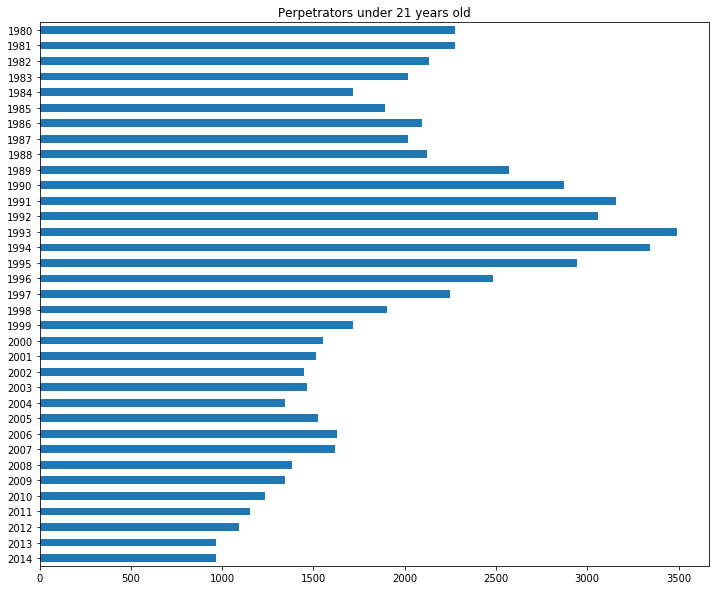

In [18]:
data['Perpetrator_Age'] = data['Perpetrator_Age'].astype("int")
mask = (data['Perpetrator_Age'] < 21)
young_victims =  pd.DataFrame(data.loc[mask], columns = ['Year']) 
count_years = young_victims.stack().value_counts()
homicides_young = count_years.sort_index(axis=0, ascending=False)
mask2 = (data['Perpetrator_Age'] > 21)
adult_victims =  pd.DataFrame(data.loc[mask2], columns = ['Year']) 
count_years = adult_victims.stack().value_counts()
homicides_adult = count_years.sort_index(axis=0, ascending=False)
print(homicides_young.plot(kind='barh', fontsize=10,  width=0.5,  figsize=(12, 10), title='Perpetrators under 21 years old'))

Text(0, 0.5, '')

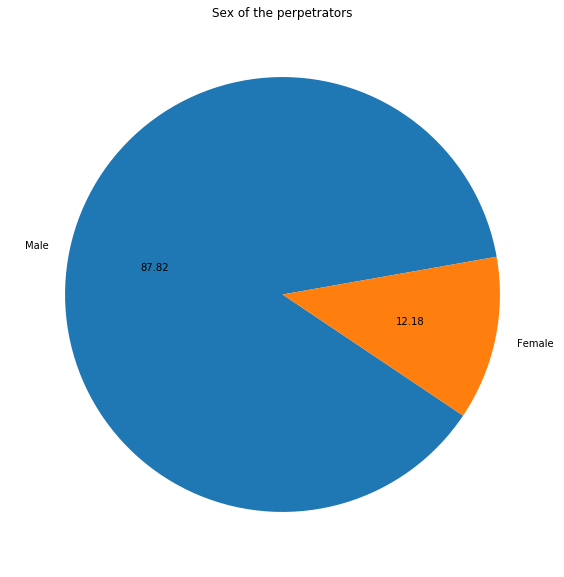

In [ ]:
perpetrator_sex = pd.DataFrame(data, columns = ['Perpetrator_Sex']) 
count_perpetrator_sex = perpetrator_sex.stack().value_counts()
ax = count_perpetrator_sex.plot(kind = 'pie',
                              title = 'Sex of the perpetrators',
                                figsize=(10,10),

                              startangle = 10,
                              autopct='%.2f')
ax.set_ylabel('')

Text(0, 0.5, '')

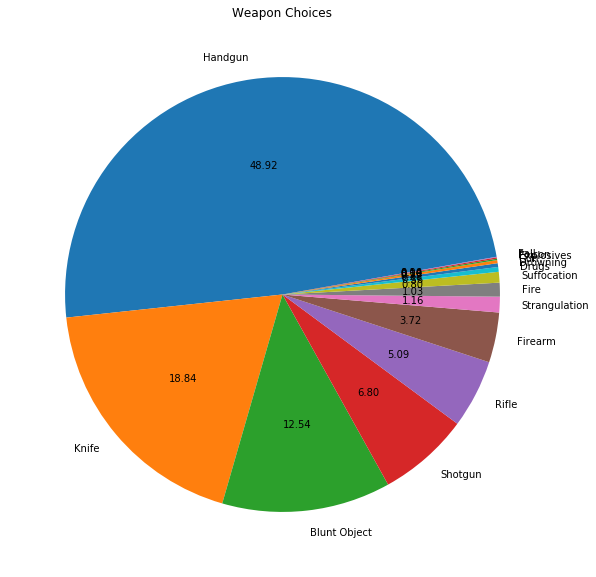

In [ ]:
weapon_choice = pd.DataFrame(data, columns = ['Weapon']) 
count_weapon_choice = weapon_choice.stack().value_counts()
ax = count_weapon_choice.plot(kind = 'pie',
                                figsize=(10,10),
                              title = 'Weapon Choices',
                              startangle = 10,
                              autopct='%.2f')
ax.set_ylabel('')

Text(0, 0.5, 'GDP')

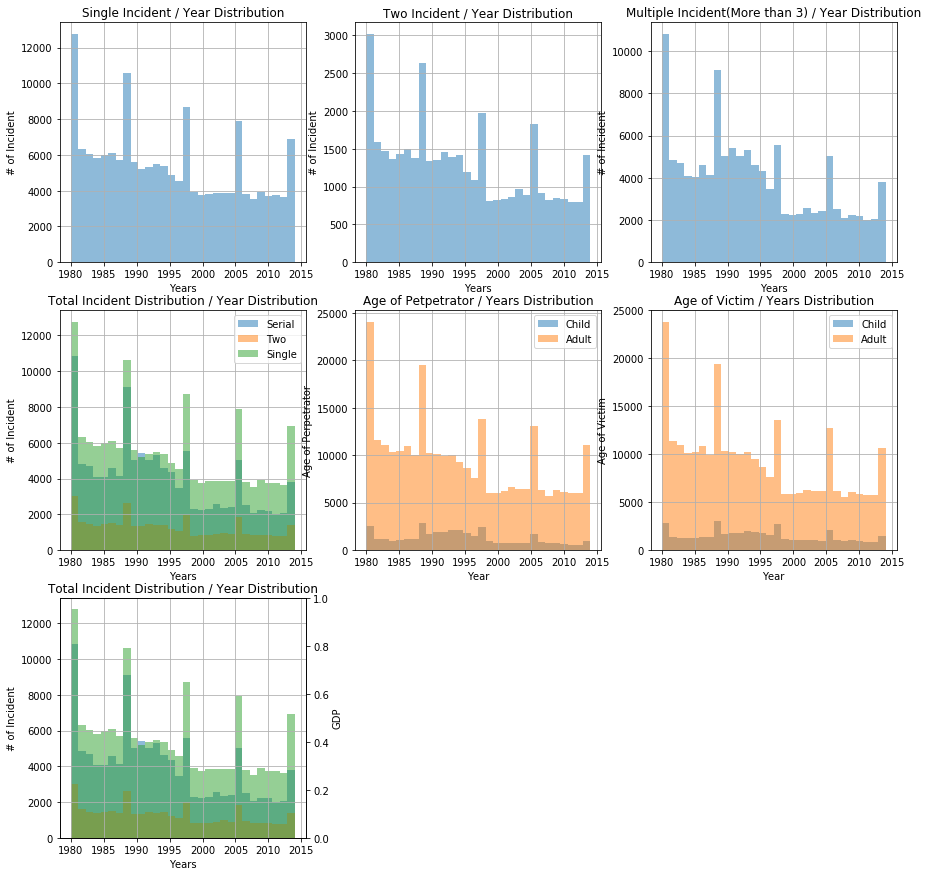

In [ ]:
single_incident = data[data['Incident'] == 1]['Year']
mul_incident= data[data['Incident'] >= 3]['Year']
two_incident= data[data['Incident'] == 2]['Year'] 

data["Perpetrator_Age"] = data["Perpetrator_Age"].astype(int)


cocuk_saldirgan = data[data['Perpetrator_Age'] <= 18]['Year']
resit_saldirgan = data[data['Perpetrator_Age'] > 18]['Year']
cocuk_kurban = data[data['Victim_Age'].astype(int) <= 18]['Year'].astype(int)
resit_kurban = data[data['Victim_Age'].astype(int) > 18]['Year'].astype(int)




fig2 = plt.figure ( figsize=(15,15))

ax3 = fig2.add_subplot(331)
ax3.set_xlabel('Years')
ax3.set_ylabel('# of Incident')
ax3.set_title('Single Incident / Year Distribution')
single_incident.hist(alpha=0.5,bins = 30)


ax4 = fig2.add_subplot(332)
ax4.set_xlabel('Years')
ax4.set_ylabel('# of Incident')
ax4.set_title('Two Incident / Year Distribution')
two_incident.hist(alpha=0.5,bins = 30)


ax5 = fig2.add_subplot(333)
ax5.set_xlabel('Years')
ax5.set_ylabel('# of Incident')
ax5.set_title('Multiple Incident(More than 3) / Year Distribution')
mul_incident.hist(alpha=0.5,bins = 30)


ax6 = fig2.add_subplot(334)
ax6.set_xlabel('Years')
ax6.set_ylabel('# of Incident')
ax6.set_title('Total Incident Distribution / Year Distribution')
mul_incident.hist(alpha=0.5,bins = 30, label="Serial")
ax7=fig2.add_subplot(334)
two_incident.hist(alpha=0.5,bins = 30, label="Two")
ax8=fig2.add_subplot(334)
single_incident.hist(alpha=0.5,bins = 30, label="Single")
ax6.legend(loc = 'upper right')


ax9 = fig2.add_subplot(335)
ax9.set_xlabel('Year')
ax9.set_ylabel('Age of Perpetrator')
ax9.set_title('Age of Petpetrator / Years Distribution')
cocuk_saldirgan.hist(alpha=0.5,bins = 30, label="Child")
ax10=fig2.add_subplot(335)
resit_saldirgan.hist(alpha=0.5,bins=30, label="Adult")
ax9.legend(loc = 'upper right')


ax11 = fig2.add_subplot(336)
ax11.set_xlabel('Year')
ax11.set_ylabel('Age of Victim')
ax11.set_title('Age of Victim / Years Distribution')
cocuk_kurban.hist(alpha=0.5,bins = 30, label="Child")
ax12=fig2.add_subplot(336)
resit_kurban.hist(alpha=0.5,bins=30, label="Adult")
ax11.legend(loc = 'upper right')


#Incident Total
ax13 = fig2.add_subplot(337)
ax13.set_xlabel('Years')
ax13.set_ylabel('# of Incident')
ax13.set_title('Total Incident Distribution / Year Distribution')
mul_incident.hist(alpha=0.5,bins = 30, label="Serial")
ax14=fig2.add_subplot(337)
two_incident.hist(alpha=0.5,bins = 30, label="Two")
ax15=fig2.add_subplot(337)
single_incident.hist(alpha=0.5,bins = 30, label="Single")

ax16=fig2.add_subplot(337)
ax16 = ax13.twinx()

ax16.set_ylabel('GDP')



Below graphs answers relation between age and perpetrator.Its clear that when people got older,number of incidents decreases significantly.Most perpetrators are aged between 16-30

AxesSubplot(0.125,0.125;0.775x0.755)


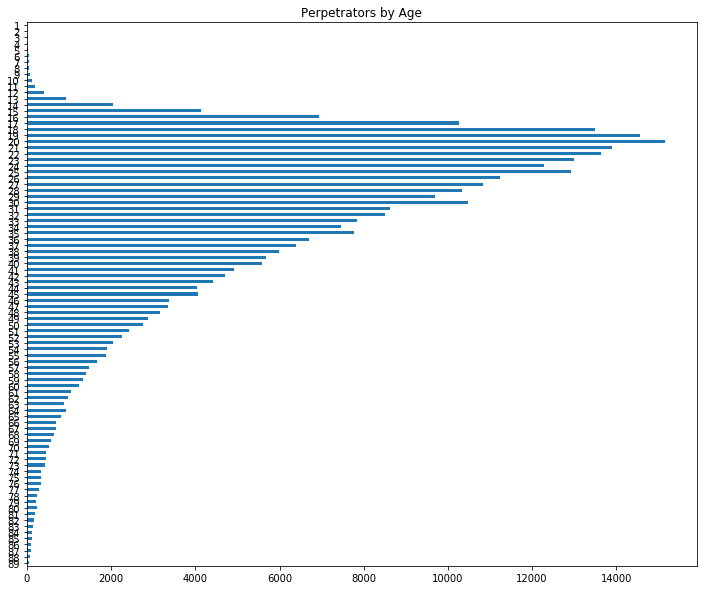

In [ ]:
data['Perpetrator_Age'] = data['Perpetrator_Age'].astype("int")
mask = (data['Perpetrator_Age'] < 90)
young_victims =  pd.DataFrame(data.loc[mask], columns = ['Perpetrator_Age']) 
count_years = young_victims.stack().value_counts()
homicides_young = count_years.sort_index(axis=0, ascending=False)
mask2 = (data['Perpetrator_Age'] >1)
adult_victims =  pd.DataFrame(data.loc[mask2], columns = ['Year']) 
count_years = adult_victims.stack().value_counts()
homicides_adult = count_years.sort_index(axis=0, ascending=False)
print(homicides_young.plot(kind='barh', fontsize=10,  width=0.5,  figsize=(12, 10), title='Perpetrators by Age'))

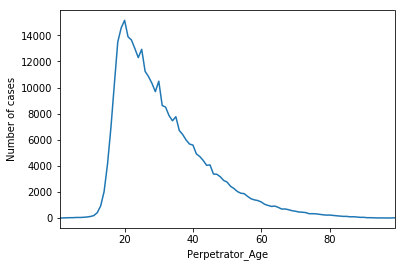

In [ ]:
ax = data.groupby(['Perpetrator_Age'])['Weapon'].count().plot(kind='line'); ax.set_ylabel("Number of cases");

Age,Weapon choice and Number of cases


Text(0, 0.5, 'Number of cases')

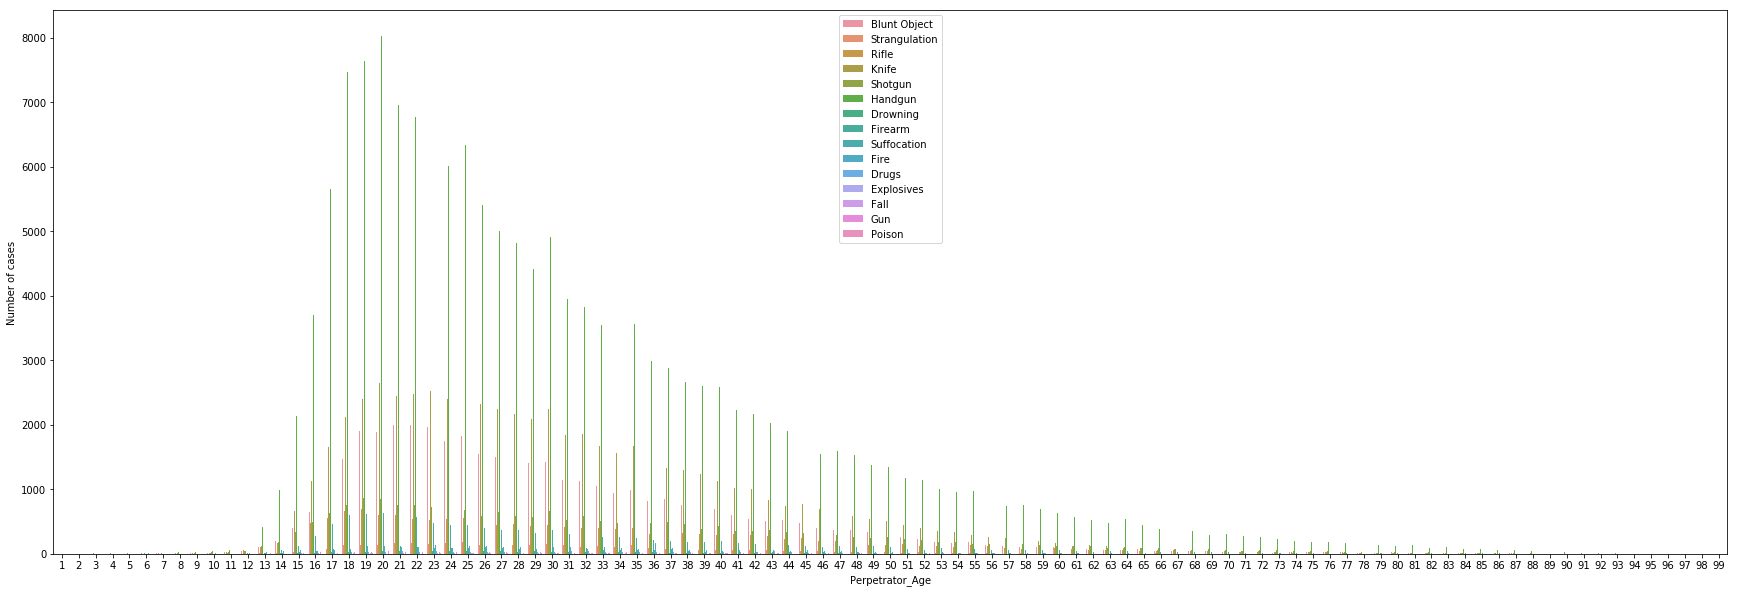

In [ ]:
print("Age,Weapon choice and Number of cases")
plt.figure(figsize=(30,10)) 

ax = sns.countplot(x="Perpetrator_Age", hue="Weapon", data=data)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels)
ax.set_ylabel("Number of cases")

Text(0, 0.5, 'Number of cases')

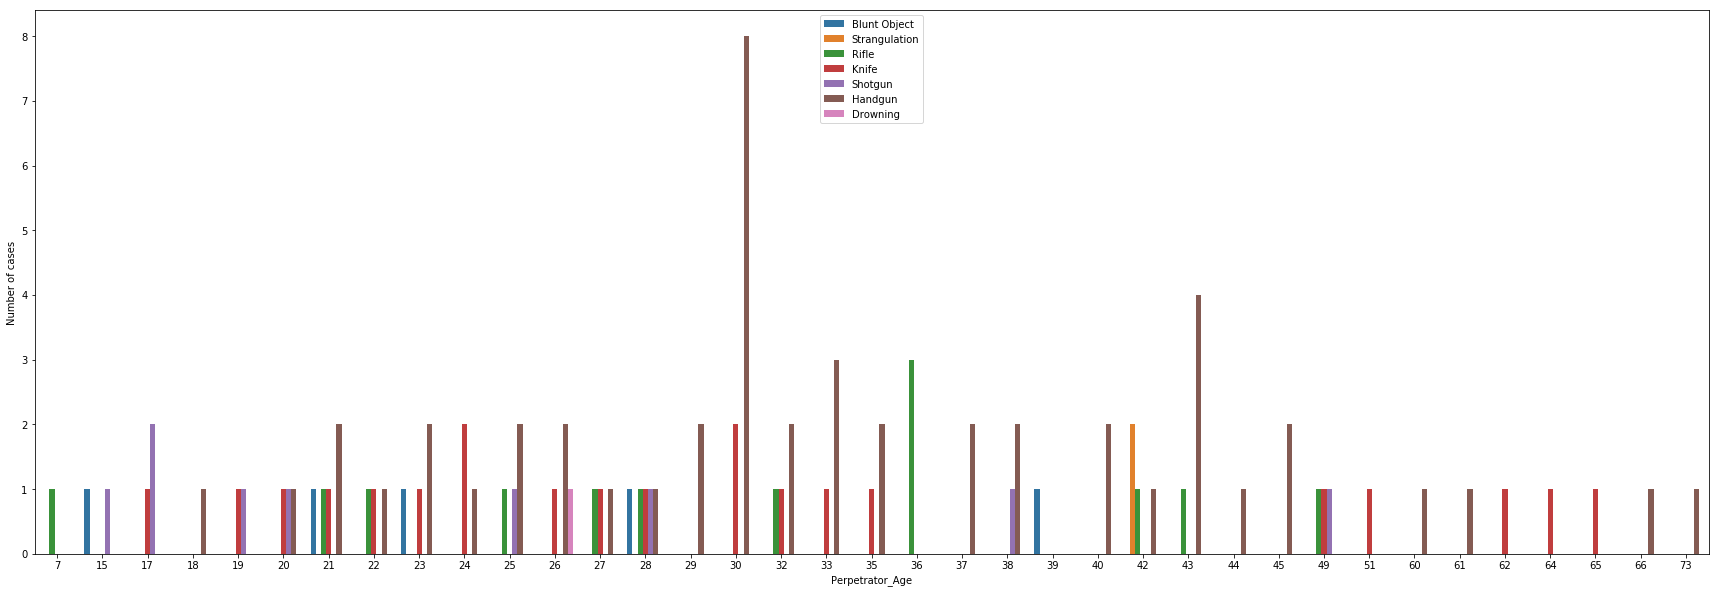

In [ ]:
plt.figure(figsize=(30,10)) 

ax = sns.countplot(x="Perpetrator_Age", hue="Weapon", data=data.head(100))

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels)
ax.set_ylabel("Number of cases")



# Hypothesis Testing

Our hypothesis is:

**Is there a relationship between homicide incidents and growth rate of GDP of US between 1980-2014 ? **

First we merge our minimal dataset with our main dataset and then generate our graphs and tests to  check whether there is a relationship between countires gdp growth and homicide incidents.



In [ ]:
dataForHypothesis = pd.read_csv("hdb.csv", low_memory=False)

dataForHypothesis = dataForHypothesis.drop(['Agency Code', 'Agency Name', 'Agency Type', 'Victim Ethnicity', 'Perpetrator Race', 'Perpetrator Sex', 'Victim Sex', 'Victim Race', 'Perpetrator Ethnicity', 'Relationship', 'Victim Count', 'Perpetrator Count', 'Crime Type', 'City', 'State', 'Crime Solved', 'Record Source', 'Weapon', 'Month', 'Record ID'], axis=1)
gdpdata = pd.read_csv("gdpdata.csv", low_memory=False)
mergedData = pd.merge(dataForHypothesis, gdpdata, on='Year')
mergedData.head()

,Year,Incident,Victim Age,Perpetrator Age,Gdp
0,1980,1,14,15,-0.244596
1,1980,1,43,42,-0.244596
2,1980,2,30,0,-0.244596
3,1980,1,43,42,-0.244596
4,1980,2,30,0,-0.244596


Below graph is very important for our hypothesis testing since its easy to observe homicide incident and GDP relation

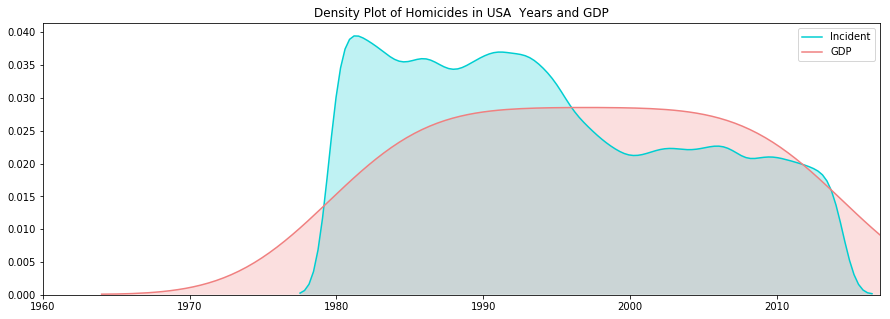

In [ ]:
plt.figure(figsize=(15,5))
sns.kdeplot(data["Year"], color="darkturquoise", shade=True)
sns.kdeplot(gdpdata["Year"], color="lightcoral", shade=True)
plt.legend(['Incident', 'GDP'])
plt.title('Density Plot of Homicides in USA  Years and GDP')
plt.xlim(1960,2017)

plt.show()

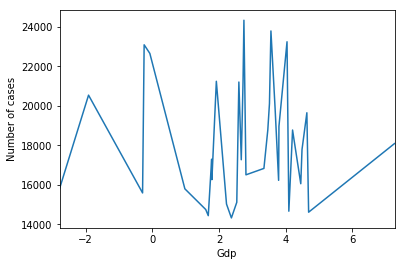

In [ ]:
ax = mergedData.groupby(['Gdp'])['Incident'].count().plot(kind='line'); ax.set_ylabel("Number of cases");

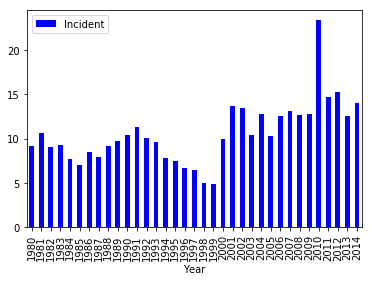

In [ ]:

compare_attr = 'Year'
df_pclass = data[[compare_attr, 'Incident']].groupby(compare_attr).mean()
df_pclass.plot.bar(color="blue")

In [ ]:
freq = pd.crosstab(index=[mergedData['Incident']], columns=mergedData['Gdp'])
freq

Gdp,-2.77553,-1.910891,-0.291621,-0.244596,-0.074085,0.975982,1.6014549999999999,1.677332,1.77857,1.786128,...,3.7958809999999996,4.037643,4.092176,4.203972,4.238738,4.449911,4.487026,4.632457,4.6852,7.259086999999999
Incident,,,,,,,,,,,,,,,,,,,,,
0,1,0,1,0,0,1,1,1,2,1,...,0,0,0,0,0,0,0,0,0,0
1,7108,8968,6690,9402,7863,6600,6649,6605,7172,6885,...,8303,8593,6117,7555,8258,7708,7982,8190,7069,8010
2,1859,2364,1855,2472,2353,1741,1742,1717,2035,1818,...,2030,2675,1663,1996,2164,1822,1930,2135,1625,2086
3,1012,1204,997,1320,1313,918,935,940,1115,993,...,1193,1496,941,1082,1128,981,1114,1140,912,1080
4,698,819,666,936,937,654,661,646,769,682,...,835,1092,627,757,780,678,766,756,603,727
5,509,614,530,710,738,516,487,471,587,531,...,651,805,460,555,582,490,585,600,459,546
6,414,504,408,563,605,415,371,358,475,407,...,511,674,357,441,463,403,455,457,357,435
7,339,409,332,469,502,341,308,302,383,343,...,412,562,307,388,382,318,377,370,299,372
8,285,346,286,387,421,286,254,263,329,294,...,352,460,258,337,326,278,318,322,261,313


In [ ]:
import scipy.stats as stats
chi_stats = stats.chi2_contingency(freq)
chi_stats

(53820.17611527991,
 0.0,
 33966,
 array([[3.96958904e-01, 5.14843669e-01, 3.90819072e-01, ...,
         4.92514731e-01, 3.66410109e-01, 4.53420293e-01],
        [6.58773149e+03, 8.54408811e+03, 6.48583791e+03, ...,
         8.17352822e+03, 6.08075897e+03, 7.52473648e+03],
        [1.78083207e+03, 2.30968523e+03, 1.75328764e+03, ...,
         2.20951343e+03, 1.64378445e+03, 2.03412845e+03],
        ...,
        [3.96958904e-01, 5.14843669e-01, 3.90819072e-01, ...,
         4.92514731e-01, 3.66410109e-01, 4.53420293e-01],
        [3.96958904e-01, 5.14843669e-01, 3.90819072e-01, ...,
         4.92514731e-01, 3.66410109e-01, 4.53420293e-01],
        [3.96958904e-01, 5.14843669e-01, 3.90819072e-01, ...,
         4.92514731e-01, 3.66410109e-01, 4.53420293e-01]]))

In [ ]:
alpha = 0.05
critical_value = crit = stats.chi2.ppf(q = 1 - alpha, 
                      df = chi_stats[2]) 
critical_value

34395.84484657395

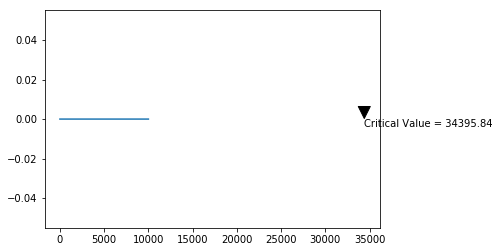

In [ ]:
x = np.linspace(0, 10000, 50000)
plt.plot(x, stats.chi2.pdf(x, chi_stats[2]))
plt.axvline(x=critical_value, ymin=0.05,ymax=0.05, c='r')
plt.annotate('Critical Value = {0:.2f}'.format(critical_value), xy=(critical_value, 0.0002), xytext=(critical_value, 0.0004), 
            arrowprops=dict(facecolor='black', shrink=0.5), verticalalignment='top' )
plt.fill_between(x, stats.chi2.pdf(x, chi_stats[2]), where= x > critical_value, facecolor='red', interpolate=True)

,Year,Incident,Victim Age,Gdp
Year,1.000000,0.124125,0.005514,-0.166526
Incident,0.124125,1.000000,-0.006918,-0.055574
Victim Age,0.005514,-0.006918,1.000000,0.003340
Gdp,-0.166526,-0.055574,0.003340,1.000000


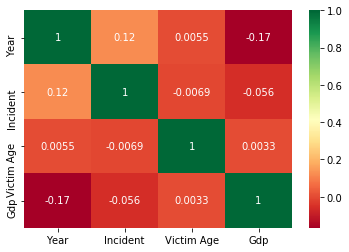

In [ ]:
corr = mergedData.corr()
sns.heatmap(corr, annot=True, cbar=True, cmap="RdYlGn")
corr

Linear Regression

In [ ]:

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm
import sklearn.model_selection

import seaborn as sns

mergedData.dropna()
print(mergedData.head())


someData = pd.DataFrame(mergedData)

print(someData.info())
X = someData.drop('Gdp', axis = 1)
Y = someData['Gdp']

X = X.apply(pd.to_numeric, errors='coerce')
Y = Y.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True)
Y.fillna(0, inplace=True)

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

   Year  Incident  Victim Age Perpetrator Age       Gdp
0  1980         1          14              15 -0.244596
1  1980         1          43              42 -0.244596
2  1980         2          30               0 -0.244596
3  1980         1          43              42 -0.244596
4  1980         2          30               0 -0.244596
<class 'pandas.core.frame.DataFrame'>
Int64Index: 638454 entries, 0 to 638453
Data columns (total 5 columns):
Year               638454 non-null int64
Incident           638454 non-null int64
Victim Age         638454 non-null int64
Perpetrator Age    638454 non-null object
Gdp                638454 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 29.2+ MB
None
(427764, 4)
(210690, 4)
(427764,)
(210690,)


Linear Regression for predicting GDP


Text(0, 0.5, 'Predicted GDP: $\\hat{Y}_i$')

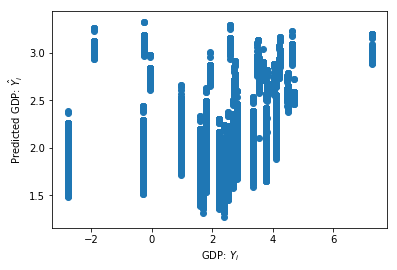

In [ ]:
from sklearn.linear_model import LinearRegression

print("Linear Regression for predicting GDP")


lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("GDP: $Y_i$")
plt.ylabel("Predicted GDP: $\hat{Y}_i$")

# Machine Learning Techniques ( Desicion Trees - Random Forest - Neural Network - SVM ) 

By using desicion trees we are trying to guess victims and perpetrators sex.
First we will transform our  non numerical columns to numerical data values with .LabelEncoder() so that we can use it in desicion tree algorithm.





In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(data["Weapon"])
list(le.classes_)
le2 = preprocessing.LabelEncoder()
le2.fit(data["City"])
list(le2.classes_)
le3 = preprocessing.LabelEncoder()
le3.fit(data["State"])
list(le3.classes_)
le4 = preprocessing.LabelEncoder()
le4.fit(data["Month"])
list(le4.classes_)
le5 = preprocessing.LabelEncoder()
le5.fit(data["Crime_Solved"])
list(le5.classes_)
le6 = preprocessing.LabelEncoder()
le6.fit(data["Victim_Sex"])
list(le6.classes_)
le7 = preprocessing.LabelEncoder()
le7.fit(data["Victim_Race"])
list(le7.classes_)
le8 = preprocessing.LabelEncoder()
le8.fit(data["Perpetrator_Sex"])
list(le8.classes_)
le9 = preprocessing.LabelEncoder()
le9.fit(data["Perpetrator_Race"])
list(le9.classes_)
le11 = preprocessing.LabelEncoder()
le11.fit(data["Year"])
list(le11.classes_)
le10 = preprocessing.LabelEncoder()
le10.fit(data["Relationship"])
print("Labels are transformed to numerical values.")
le10.transform(data["Relationship"])
#list(le10.classes_)



Labels are transformed to numerical values.


array([ 0,  0,  0, ...,  6, 25,  6])

In [ ]:
print("Features are transformed and trained.")
features = ["Incident","City","State","Month","Crime_Solved","Year","Victim_Race","Perpetrator_Sex","Perpetrator_Race","Relationship","Perpetrator_Age","Victim_Age", "Weapon"]
train,test = train_test_split(data, test_size = 0.15)
print("Training size: {}; Test Size: {}".format(len(train),len(test)))
train["Weapon"]  = le.transform(train["Weapon"])
test["Weapon"]  = le.transform(test["Weapon"])
train["City"]  = le2.transform(train["City"])
test["City"]  = le2.transform(test["City"])
train["State"]  = le3.transform(train["State"])
test["State"]  = le3.transform(test["State"])
train["Month"]  = le4.transform(train["Month"])
test["Month"]  = le4.transform(test["Month"])
train["Crime_Solved"]  = le5.transform(train["Crime_Solved"])
test["Crime_Solved"]  = le5.transform(test["Crime_Solved"])
train["Victim_Sex"]  = le6.transform(train["Victim_Sex"])
test["Victim_Sex"]  = le6.transform(test["Victim_Sex"])
train["Victim_Race"]  = le7.transform(train["Victim_Race"])
test["Victim_Race"]  = le7.transform(test["Victim_Race"])
train["Perpetrator_Sex"]  = le8.transform(train["Perpetrator_Sex"])
test["Perpetrator_Sex"]  = le8.transform(test["Perpetrator_Sex"])
train["Perpetrator_Race"]  = le9.transform(train["Perpetrator_Race"])
test["Perpetrator_Race"]  = le9.transform(test["Perpetrator_Race"])
train["Relationship"]  = le10.transform(train["Relationship"])
test["Relationship"]  = le10.transform(test["Relationship"])
train["Year"]  = le11.transform(train["Year"])
test["Year"]  = le11.transform(test["Year"])



Features are transformed and trained.
Training size: 276282; Test Size: 48756


This is the critical part because we are specifying our features which is X variable and result Victim_Sex which is Y variable as numerical values.



In [ ]:
x_train = train[features]
y_train = train["Victim_Sex"]
x_test = test[features]
y_test = test["Victim_Sex"]

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
C = DecisionTreeClassifier(min_samples_split=10000)
dt = C.fit(x_train,y_train)
y_pred = C.predict(x_test)
score_t = C.score(x_train,y_train)
score_p = C.score(x_test,y_test)
print("T score and P score:")
print("Training Accuracy:",score_t, "Testing accuracy:", score_p )
print("P score shows us that our test is not determined by coincidence.")
x_train.head()
y_train.head()
x_test.head()

T score and P score:
Training Accuracy: 0.8694667043093651 Testing accuracy: 0.8696775781442284
P score shows us that our test is not determined by coincidence.


,Incident,City,State,Month,Crime_Solved,Year,Victim_Race,Perpetrator_Sex,Perpetrator_Race,Relationship,Perpetrator_Age,Victim_Age,Weapon
52153,1,784,14,7,1,2,3,1,3,0,36,42,11
46289,10,931,4,7,1,2,3,1,3,25,17,26,8
173912,1,1153,36,11,1,8,1,1,3,25,20,34,8
72696,1,972,17,0,1,3,3,1,3,10,59,53,8
333378,3,693,43,8,1,15,3,1,3,0,24,23,11


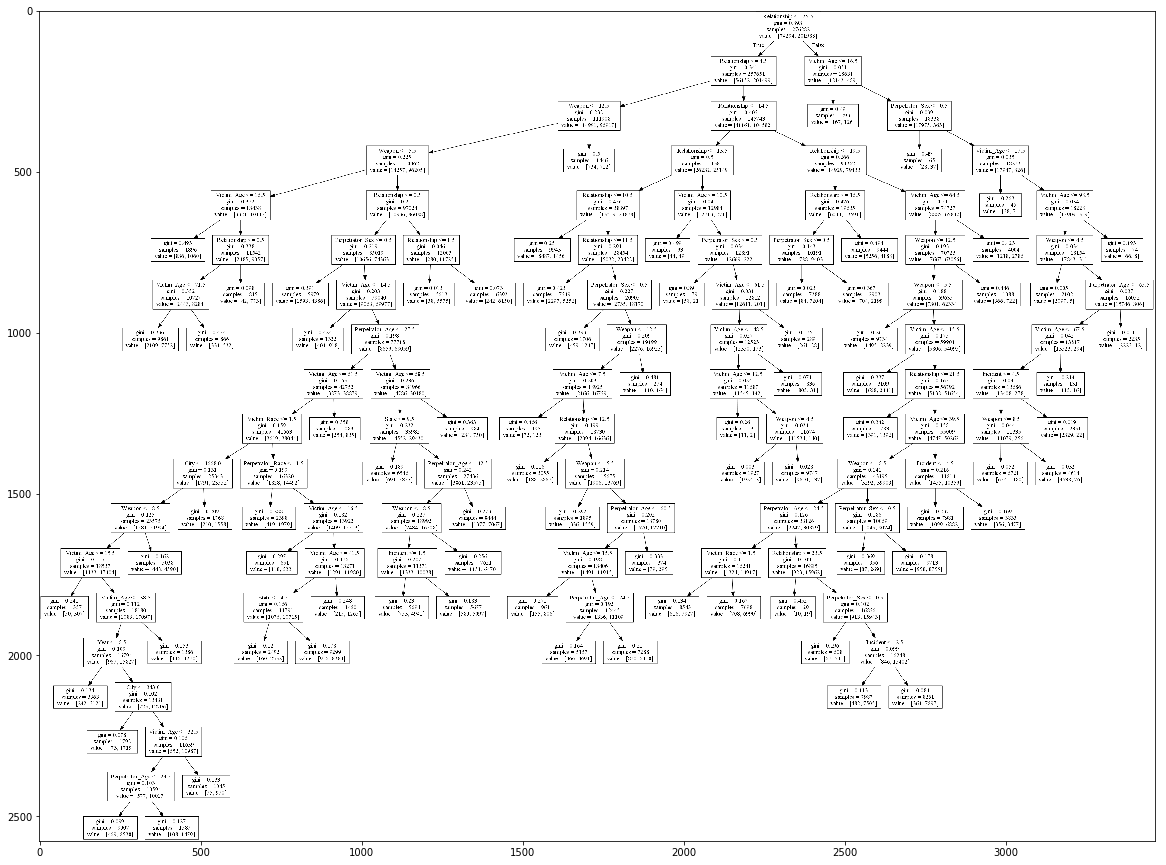

In [ ]:
import io 
import graphviz
from scipy import misc

import pydotplus
def show_tree(tree,features,path):
    f=io.StringIO()
    export_graphviz(tree,out_file=f,feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = misc.imread(path)
    plt.rcParams["figure.figsize"] = (20,20)
    plt.imshow(img)
show_tree(dt,features,'dec_tree_01.png')



Training size: 276282; Test Size: 48756
accuracy score: 0.93


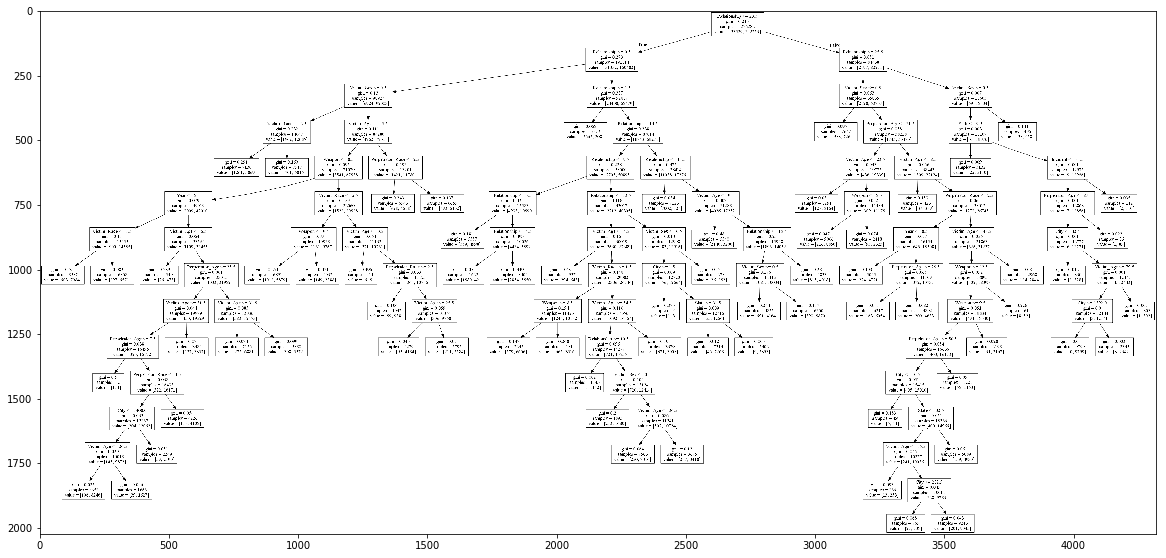

In [ ]:
features = ["Incident","City","State","Month","Crime_Solved","Year","Victim_Race","Victim_Sex","Perpetrator_Race","Relationship","Perpetrator_Age","Victim_Age", "Weapon"]
train,test = train_test_split(data, test_size = 0.15)
print("Training size: {}; Test Size: {}".format(len(train),len(test)))
train["Weapon"]  = le.transform(train["Weapon"])
test["Weapon"]  = le.transform(test["Weapon"])
train["City"]  = le2.transform(train["City"])
test["City"]  = le2.transform(test["City"])
train["State"]  = le3.transform(train["State"])
test["State"]  = le3.transform(test["State"])
train["Month"]  = le4.transform(train["Month"])
test["Month"]  = le4.transform(test["Month"])
train["Crime_Solved"]  = le5.transform(train["Crime_Solved"])
test["Crime_Solved"]  = le5.transform(test["Crime_Solved"])
train["Victim_Sex"]  = le6.transform(train["Victim_Sex"])
test["Victim_Sex"]  = le6.transform(test["Victim_Sex"])
train["Victim_Race"]  = le7.transform(train["Victim_Race"])
test["Victim_Race"]  = le7.transform(test["Victim_Race"])
train["Perpetrator_Sex"]  = le8.transform(train["Perpetrator_Sex"])
test["Perpetrator_Sex"]  = le8.transform(test["Perpetrator_Sex"])
train["Perpetrator_Race"]  = le9.transform(train["Perpetrator_Race"])
test["Perpetrator_Race"]  = le9.transform(test["Perpetrator_Race"])
train["Relationship"]  = le10.transform(train["Relationship"])
test["Relationship"]  = le10.transform(test["Relationship"])
train["Year"]  = le11.transform(train["Year"])
test["Year"]  = le11.transform(test["Year"])

x_train = train[features]
y_train = train["Perpetrator_Sex"]
x_test = test[features]
y_test = test["Perpetrator_Sex"]
x_test
C = DecisionTreeClassifier(min_samples_split=10000)

dt = C.fit(x_train,y_train)
y_pred = C.predict(x_test)
print("accuracy score: %.2f" % accuracy_score(y_test, y_pred))
show_tree(dt,features,'dec_tree_02.png')



In [ ]:
print("Confusion Matrix:")
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,  C.predict(x_test))


Confusion Matrix:


array([[ 2558,  3512],
       [   60, 42626]], dtype=int64)

# Neural Network



In [ ]:
# WORKING BUT TAKES TOO LONG (SOMETIMES DONE IN FEW MINUTES)
# RESULT IS : 
#Neural network for perpetrator sex.
#Training Accuracy: 0.8904199332566002 Testing accuracy: 0.8898186889818689
#print("Neural network for perpetrator sex.")
#from sklearn.neural_network import MLPClassifier

#model = MLPClassifier()
#model.fit (x_train, y_train)
#score_t = model.score(x_train,y_train)
#score_p = model.score(x_test,y_test)

#print("Training Accuracy:",score_t, "Testing accuracy:", score_p )

# SVM ( Support Vector Machine ) 



In [ ]:
print("Support Vector Machine algorithm for perpetrator sex")
from sklearn.svm import LinearSVC
model = LinearSVC()
model.fit (x_train, y_train)
score_t = model.score(x_train,y_train)
score_p = model.score(x_test,y_test)

print("Training Accuracy:",score_t, "Testing accuracy:", score_p )
print("As expected because there are too many variables(dimensions of vectors) SVM algorithm underperforms.")

Support Vector Machine algorithm for perpetrator sex


In [ ]:
print("Inverse transform le for random forest algorithm.")
train["Weapon"]  = le.inverse_transform(train["Weapon"])
test["Weapon"]  = le.inverse_transform(test["Weapon"])

train["City"]  = le2.inverse_transform(train["City"])
test["City"]  = le2.inverse_transform(test["City"])

train["State"]  = le3.inverse_transform(train["State"])
test["State"]  = le3.inverse_transform(test["State"])

train["Month"]  = le4.inverse_transform(train["Month"])
test["Month"]  = le4.inverse_transform(test["Month"])

train["Crime_Solved"]  = le5.inverse_transform(train["Crime_Solved"])
test["Crime_Solved"]  = le5.inverse_transform(test["Crime_Solved"])

train["Victim_Sex"]  = le6.inverse_transform(train["Victim_Sex"])
test["Victim_Sex"]  = le6.inverse_transform(test["Victim_Sex"])

train["Victim_Race"]  = le7.inverse_transform(train["Victim_Race"])
test["Victim_Race"]  = le7.inverse_transform(test["Victim_Race"])

train["Perpetrator_Sex"]  = le8.inverse_transform(train["Perpetrator_Sex"])
test["Perpetrator_Sex"]  = le8.inverse_transform(test["Perpetrator_Sex"])

train["Perpetrator_Race"]  = le9.inverse_transform(train["Perpetrator_Race"])
test["Perpetrator_Race"]  = le9.inverse_transform(test["Perpetrator_Race"])

train["Relationship"]  = le10.inverse_transform(train["Relationship"])
test["Relationship"]  = le10.inverse_transform(test["Relationship"])

# Random Forest 
Here we will apply random forest algorithm to get more accurate results than desicion trees.Random forest algorithm generates multiple desicion trees and merges them for this purpose.

First we will apply random forest for perpetrator sex.

In [ ]:
features = ["Incident","City","State","Month","Crime_Solved","Year","Victim_Race","Victim_Sex","Perpetrator_Race","Relationship","Perpetrator_Age","Victim_Age", "Weapon"]
train,test = train_test_split(data, test_size = 0.15)
print("Training size: {}; Test Size: {}".format(len(train),len(test)))

In [ ]:
train["Weapon"]  = le.transform(train["Weapon"])
test["Weapon"]  = le.transform(test["Weapon"])
train["City"]  = le2.transform(train["City"])
test["City"]  = le2.transform(test["City"])
train["State"]  = le3.transform(train["State"])
test["State"]  = le3.transform(test["State"])
train["Month"]  = le4.transform(train["Month"])
test["Month"]  = le4.transform(test["Month"])
train["Crime_Solved"]  = le5.transform(train["Crime_Solved"])
test["Crime_Solved"]  = le5.transform(test["Crime_Solved"])
train["Victim_Sex"]  = le6.transform(train["Victim_Sex"])
test["Victim_Sex"]  = le6.transform(test["Victim_Sex"])
train["Victim_Race"]  = le7.transform(train["Victim_Race"])
test["Victim_Race"]  = le7.transform(test["Victim_Race"])
train["Perpetrator_Sex"]  = le8.transform(train["Perpetrator_Sex"])
test["Perpetrator_Sex"]  = le8.transform(test["Perpetrator_Sex"])
train["Perpetrator_Race"]  = le9.transform(train["Perpetrator_Race"])
test["Perpetrator_Race"]  = le9.transform(test["Perpetrator_Race"])
train["Relationship"]  = le10.transform(train["Relationship"])
test["Relationship"]  = le10.transform(test["Relationship"])
train["Year"]  = le11.transform(train["Year"])
test["Year"]  = le11.transform(test["Year"])

In [ ]:
x_train = train[features]
y_train = train["Perpetrator_Sex"]
x_test = test[features]
y_test = test["Perpetrator_Sex"]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=50, random_state=0)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy Score: %.2f" % accuracy_score(y_test, y_pred))


Now we apply the same algorithm for victim.

In [ ]:

features = ["Incident","City","State","Month","Crime_Solved","Year","Victim_Race","Perpetrator_Sex","Perpetrator_Race","Relationship","Perpetrator_Age","Victim_Age", "Weapon"]
train,test = train_test_split(data, test_size = 0.15)
print("Training size: {}; Test Size: {}".format(len(train),len(test)))

In [ ]:
train["Weapon"]  = le.transform(train["Weapon"])
test["Weapon"]  = le.transform(test["Weapon"])
train["City"]  = le2.transform(train["City"])
test["City"]  = le2.transform(test["City"])
train["State"]  = le3.transform(train["State"])
test["State"]  = le3.transform(test["State"])
train["Month"]  = le4.transform(train["Month"])
test["Month"]  = le4.transform(test["Month"])
train["Crime_Solved"]  = le5.transform(train["Crime_Solved"])
test["Crime_Solved"]  = le5.transform(test["Crime_Solved"])
train["Victim_Sex"]  = le6.transform(train["Victim_Sex"])
test["Victim_Sex"]  = le6.transform(test["Victim_Sex"])
train["Victim_Race"]  = le7.transform(train["Victim_Race"])
test["Victim_Race"]  = le7.transform(test["Victim_Race"])
train["Perpetrator_Sex"]  = le8.transform(train["Perpetrator_Sex"])
test["Perpetrator_Sex"]  = le8.transform(test["Perpetrator_Sex"])
train["Perpetrator_Race"]  = le9.transform(train["Perpetrator_Race"])
test["Perpetrator_Race"]  = le9.transform(test["Perpetrator_Race"])
train["Relationship"]  = le10.transform(train["Relationship"])
test["Relationship"]  = le10.transform(test["Relationship"])
train["Year"]  = le11.transform(train["Year"])
test["Year"]  = le11.transform(test["Year"])

In [ ]:
x_train = train[features]
y_train = train["Victim_Sex"]
x_test = test[features]
y_test = test["Victim_Sex"]

In [ ]:
forest = RandomForestClassifier(max_depth=50, random_state=0)
forest = forest.fit(x_train,y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(12):
    print("%d. feature %s (%f)" % (f + 1, x_train.columns[indices[f]], importances[indices[f]]))


print("The most important feature in  predicting victims sex is relationship.For example if perpetrator was the victims husband,perpetrator is most likely a female.")
print("Second most important feature is Victim age followed by perpetrator age probably it is caused by males and females are tend to homicide in different ages.")

In [ ]:

y_pred = clf.predict(x_test)
print("accuracy score: %.2f" % accuracy_score(y_test, y_pred))


In [ ]:
X = data[['Perpetrator_Age', 'Victim_Age', 'Year','Record_ID']]
X1= data[['Record_ID']] 
y = data[['Year']] #target


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
lr.fit(X_train, y_train)

In [ ]:
lr.coef_


In [ ]:
lr.intercept_

In [ ]:
for index, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lr.coef_[0][index]))

# Linear Regression Model

In [ ]:
regression_model = LinearRegression()
regression_model.fit(X, y)

In [ ]:
from sklearn.metrics import mean_squared_error

y_predict = lr.predict(X_test)

lr_mse = mean_squared_error(y_predict, y_test)

print(lr_mse)

In [ ]:
lr.score(X_test, y_test)

In [ ]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.25, random_state=1)

In [ ]:
lr.fit(X1_train, y_train)

In [ ]:
lr.coef_

In [ ]:
lr.intercept_

In [ ]:
from sklearn.metrics import mean_squared_error

y_predict = lr.predict(X1_test)

lr_mse = mean_squared_error(y_predict, y_test)

print(lr_mse)

In [ ]:
lr.score(X1_test, y_test)

In [ ]:
line_pred = lr.coef_ * X1 + lr.intercept_

In [ ]:
#plt.plot(X, y, 'go', X, line_pred)
#plt.show()